In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
original_data = pd.read_csv("original_covid_and_healthy_spectra.csv")
original_data.head()

,400,402,405,407,410,412,415,417,420,422,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,diagnostic
0,0,-0.015237,-0.030607,-0.038309,-0.039078,-0.035809,-0.031176,-0.030395,-0.033311,-0.031603,...,-0.000553,0.000118,0.000566,0.001245,0.000846,0.001106,0.001005,0.000117,0.0,Healthy
1,0,-0.012098,-0.028164,-0.035189,-0.036138,-0.031050,-0.026015,-0.027539,-0.028084,-0.027075,...,-0.000998,0.000278,-0.000123,0.000384,0.001010,0.000583,-0.000397,-0.000160,0.0,Healthy
2,0,-0.013000,-0.029058,-0.035021,-0.034994,-0.033025,-0.028413,-0.028470,-0.029737,-0.029198,...,-0.001554,0.000050,0.000866,0.000877,0.000871,0.001093,0.001058,0.000614,0.0,Healthy
3,0,-0.015728,-0.034346,-0.045140,-0.047671,-0.044334,-0.040807,-0.040474,-0.041417,-0.040699,...,-0.001541,-0.000198,0.000202,0.001023,0.000625,0.000420,0.000543,-0.000072,0.0,Healthy
4,0,-0.020355,-0.045839,-0.060556,-0.065805,-0.064988,-0.062097,-0.061955,-0.064759,-0.066886,...,-0.000088,0.000891,0.000942,0.001294,0.001878,0.001739,0.001946,0.001301,0.0,Healthy


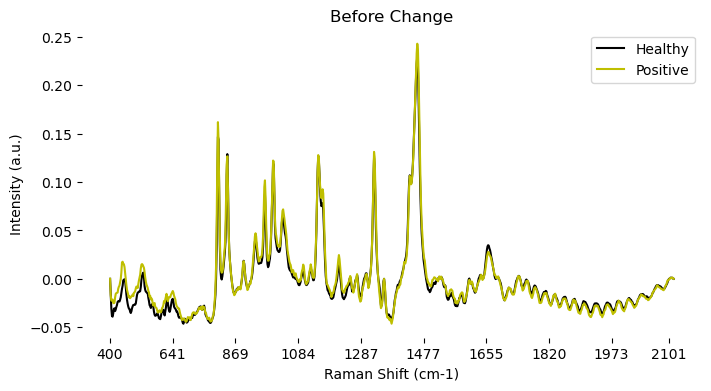

In [3]:
x_ticks = [0, 100, 200, 300, 400, 500, 600, 700, 800, 891]

plt.figure(figsize=(8, 4))

plt.xlabel("Raman Shift (cm-1)")
plt.ylabel("Intensity (a.u.)")
plt.title("Before Change")
plt.xticks(x_ticks)
plt.box(False)

plt.plot(original_data.iloc[0, :-1], "k", label="Healthy")
plt.plot(original_data.iloc[300, :-1], "y", label="Positive")

plt.legend()

In [4]:
# print zero value columns
original_data.columns[original_data.sum() == 0].values

array(['400', '904', '1080', '1251', '1359', '1410', '1517', '1647',
       '1746'], dtype=object)

In [5]:
processed_data = original_data.copy()

# drop columns with zeros
for i in ['400', '904', '1080', '1251', '1359', '1410', '1517', '1647','1746']:
    processed_data = processed_data.drop(i, axis=1)
    
# min-max normalisation
processed_data.iloc[:, :-1] = (processed_data.iloc[:, :-1] - processed_data.iloc[:, :-1].min()) \
            / (processed_data.iloc[:, :-1].max() - processed_data.iloc[:, :-1].min())

print("Before processing")
print(f'Shape: {original_data.shape}')
print(f'Min: {original_data.min(axis=1).min()}')
print(f'Max: {original_data.max(axis=1).max()}')

print()

print("After")
print(f'Shape: {processed_data.shape}')
print(f'Min: {processed_data.min(axis=1).min()}')
print(f'Max: {processed_data.max(axis=1).max()}')

processed_data

Before processing
Shape: (309, 901)
Min: -0.083183449
Max: 0.368493054

After
Shape: (309, 892)
Min: 0.0
Max: 1.0


,402,405,407,410,412,415,417,420,422,425,...,2101,2103,2104,2105,2107,2108,2109,2111,2112,diagnostic
0,0.592002,0.548748,0.536739,0.532355,0.555869,0.566688,0.554076,0.527018,0.551119,0.551780,...,0.549315,0.595472,0.657072,0.695447,0.703330,0.599616,0.548130,0.450513,0.333333,Healthy
1,0.690380,0.594307,0.582433,0.572351,0.614689,0.628464,0.587071,0.583508,0.599492,0.601003,...,0.493456,0.614314,0.579022,0.600923,0.721158,0.523330,0.271121,0.385277,0.333333,Healthy
2,0.662118,0.577626,0.584898,0.587916,0.590279,0.599756,0.576317,0.565647,0.576811,0.567400,...,0.423677,0.587453,0.691050,0.655032,0.705995,0.597685,0.558599,0.567547,0.333333,Healthy
3,0.576609,0.479003,0.436677,0.415435,0.450521,0.451427,0.437664,0.439411,0.453927,0.469724,...,0.425256,0.558172,0.615849,0.671030,0.679193,0.499525,0.456774,0.406178,0.333333,Healthy
4,0.431599,0.264646,0.210875,0.168710,0.195280,0.196636,0.189535,0.187138,0.174128,0.155649,...,0.607650,0.686626,0.699579,0.700821,0.815670,0.691990,0.734128,0.729325,0.333333,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.691097,0.821758,0.859478,0.855969,0.808473,0.743529,0.746677,0.730293,0.741120,0.744342,...,0.551200,0.587489,0.727833,0.719869,0.809738,0.645516,0.679824,0.650387,0.333333,SARS-CoV-2
305,0.524961,0.659728,0.722365,0.696923,0.657004,0.591132,0.591702,0.596106,0.644811,0.630215,...,0.653226,0.615483,0.619952,0.641604,0.754265,0.630870,0.536511,0.515300,0.333333,SARS-CoV-2
306,0.703917,0.765688,0.813434,0.826881,0.787605,0.711921,0.661212,0.673358,0.721931,0.730355,...,0.793599,0.728532,0.670757,0.725261,0.820666,0.768062,0.628359,0.714392,0.333333,SARS-CoV-2
307,0.711288,0.778441,0.846173,0.855328,0.793585,0.744521,0.712846,0.713922,0.755909,0.776534,...,0.359773,0.480391,0.513504,0.480400,0.618398,0.468032,0.269825,0.117828,0.333333,SARS-CoV-2


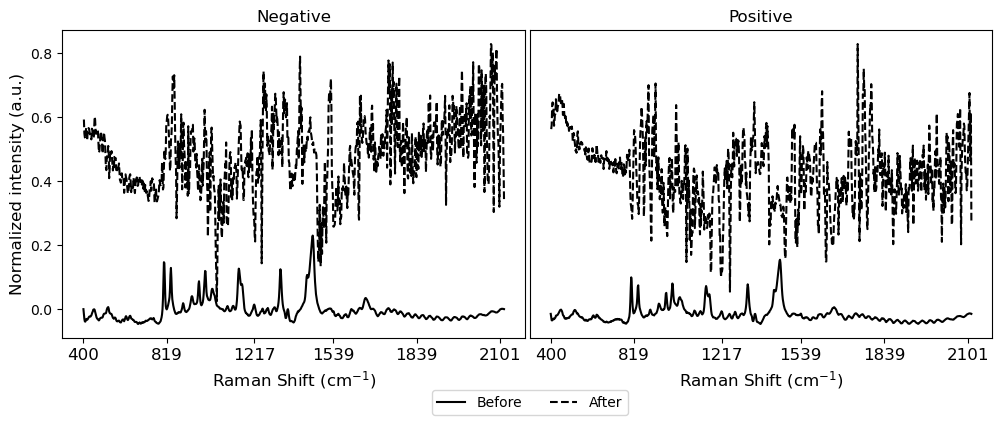

In [6]:
x_ticks = [0,  178,  365,  534, 712, 891]
y_ticks = [i for i in range(0, 11, 2)]

labels = original_data.columns[x_ticks].values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
plt.subplots_adjust(wspace=0.01, hspace=0)

ax1.set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
ax1.set_ylabel("Normalized intensity (a.u.)", fontsize=12)
ax1.set_xticks(x_ticks, labels=labels, fontsize=12)
ax1.set_title("Negative")

# first negative (healthy) sample before and after normalizing
ax1.plot(original_data.iloc[0, :-1], "k", label="Before")
ax1.plot(processed_data.iloc[0, :-1], "k--", label="After")

ax2.set_xlabel("Raman Shift (cm$^{-1}$)", fontsize=12)
ax2.set_title("Positive")
ax2.set_xticks(x_ticks, labels=labels, fontsize=12)
ax2.set_yticks([])

# first positive sample before and after normalizing
ax2.plot(original_data.iloc[150, :-1], "k", label="Before")
ax2.plot(processed_data.iloc[150, :-1], "k--", label="After")


leg = plt.legend(bbox_to_anchor=(0, -0.25), loc='lower center', ncol=2, borderaxespad=0)

plt.savefig("../../figs/sars_pre_and_post_min_max.png", bbox_inches='tight')

In [7]:
processed_data["classLabel"] = processed_data["diagnostic"].map({"Healthy": 0, "SARS-CoV-2": 1})
processed_data = processed_data.drop("diagnostic", axis=1)

In [8]:
processed_data["classLabel"].value_counts()

1    159
0    150
Name: classLabel, dtype: int64

In [9]:
#processed_data.to_csv("normalised_original_covid_and_healthy_spectra.csv", index=False)